# Teorema del muestreo: motivación

Empecemos por generar una señal continua

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/juan/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


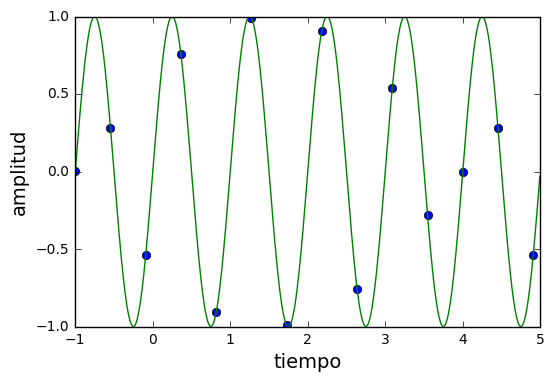

In [36]:
fig,ax = subplots()


#genero una señal 'continua', con gran densidad de puntos
f = 1.0   # Hz, frecuencia de la señal
fsc = 200 # Hz, frecuencia de muestreo densa
ti = -1
tf = 5
tc = arange(ti,tf,1/fsc) # sample interval, symmetric for convenience later
xc = sin(2*pi*f*tc)

# genero la señal 'muestreada'
fs = 2.2 # Hz, sampling rate (ie. >= 2*f) 
t = arange(ti,tf,1/fs) # sample interval, symmetric for convenience later
x = sin(2*pi*f*t)
ax.plot(t,x,'o')
ax.plot(tc,xc,'-')
ax.set_xlabel('tiempo',fontsize=14)
ax.set_ylabel('amplitud',fontsize=14)

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

In [37]:
fp = 10.0 # Hz, frecuencia de la portadora

p = sin(2*pi*fp*t)
m = x*p

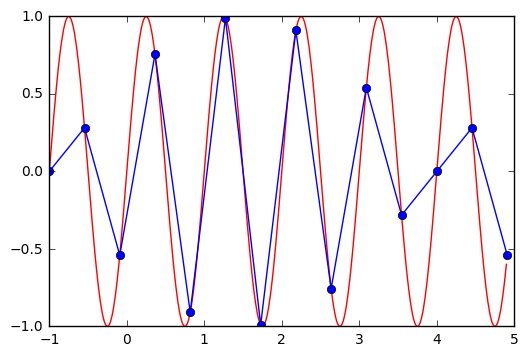

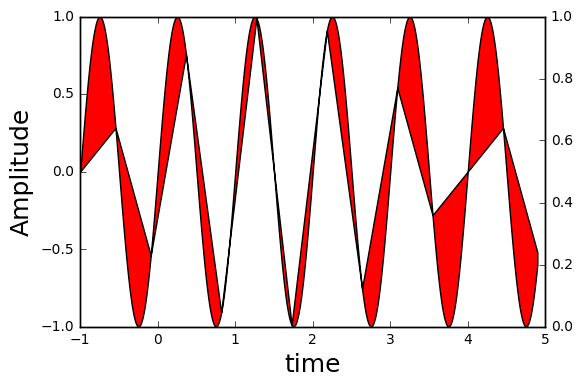

In [38]:
interval=[] # piecewise domains
apprx = []  # line on domains
# build up points *evenly* inside of intervals
tp = hstack([ linspace(t[i],t[i+1],40,False) for i in range(len(t)-1) ])
# construct arguments for piecewise2
for i in range(len(t)-1):
   interval.append( np.logical_and(t[i] <= tp,tp < t[i+1]))
   apprx.append( (x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i]) + x[i])
x_hat = np.piecewise(tp,interval,apprx) # piecewise linear approximation

xp = sin(2*pi*f*tp)

sqe = ( x_hat - xp)**2

fig,ax3=subplots()
ax3.plot(tp,xp,'r-')
ax3.plot(tp,x_hat,'b-')
ax3.plot(t,x,'o')

ax1 = figure().add_subplot(111)
ax1.fill_between(tp,x_hat,xp,facecolor='red')
ax1.set_xlabel('time',fontsize=18)
ax1.set_ylabel('Amplitude',fontsize=18)
ax2 = ax1.twinx()


## Summary

In this section, we started our investigation of the famous sampling theorem that is the bedrock of the entire field of signal processing and we asked if we could reverse-engineer the consquences of the sampling theorem by reconstructing a sampled function from its discrete samples. This led us to consider the famous *Whittaker interpolator*, whose proof we sketched here. However, after all this work, we came to a disturbing conclusion regarding the exact-ness of the sampling theorem that we will investigate in a subsequent posting.  In the meantime, I urge you to start at the top of notebook and play with the sampling frequency, and maybe even the sampled function and see what else you can discover about the sampling theorem.

## References


* This is in the [IPython Notebook format](http://ipython.org/) and was converted to HTML using [nbconvert](https://github.com/ipython/nbconvert).

* See [Signal analysis](http://books.google.com/books?id=Re5SAAAAMAAJ) for more detailed mathematical development.

* The IPython Notebook corresponding to this post can be found [here](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Sampling_Theorem.ipynb).